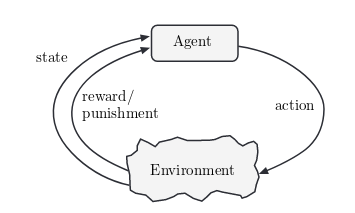

#### Step 1: Importing the required libraries

In [73]:
import numpy as np 
import pylab as pl 
import networkx as nx 

#### Step 2: Defining and visualising the graph

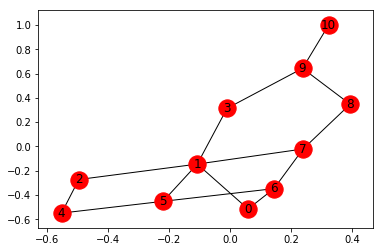

In [74]:
edges = [(0, 1), (1, 5), (5, 6), (5, 4), (1, 2),  
         (1, 3), (9, 10), (2, 4), (0, 6), (6, 7), 
         (8, 9), (7, 8), (1, 7), (3, 9)] 
  
goal = 10
G = nx.Graph() 
G.add_edges_from(edges) 
pos = nx.spring_layout(G) 
nx.draw_networkx_nodes(G, pos) 
nx.draw_networkx_edges(G, pos) 
nx.draw_networkx_labels(G, pos) 
pl.show() 

#### Step 3: Defining the reward the system for the bot

In [75]:
MATRIX_SIZE = 11
M = np.matrix(np.ones(shape =(MATRIX_SIZE, MATRIX_SIZE))) 
M *= -1
print(M)

[[-1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.]]


In [76]:
for point in edges: 
    print(point) 

(0, 1)
(1, 5)
(5, 6)
(5, 4)
(1, 2)
(1, 3)
(9, 10)
(2, 4)
(0, 6)
(6, 7)
(8, 9)
(7, 8)
(1, 7)
(3, 9)


In [77]:
for point in edges: 
    #print(point) 
    if point[1] == goal: 
        M[point] = 100
    else: 
        M[point] = 0
  
    if point[0] == goal: 
        M[point[::-1]] = 100
    else: 
        M[point[::-1]]= 0
        # reverse of point 
  
M[goal, goal]= 100
print(M) 

[[ -1.   0.  -1.  -1.  -1.  -1.   0.  -1.  -1.  -1.  -1.]
 [  0.  -1.   0.   0.  -1.   0.  -1.   0.  -1.  -1.  -1.]
 [ -1.   0.  -1.  -1.   0.  -1.  -1.  -1.  -1.  -1.  -1.]
 [ -1.   0.  -1.  -1.  -1.  -1.  -1.  -1.  -1.   0.  -1.]
 [ -1.  -1.   0.  -1.  -1.   0.  -1.  -1.  -1.  -1.  -1.]
 [ -1.   0.  -1.  -1.   0.  -1.   0.  -1.  -1.  -1.  -1.]
 [  0.  -1.  -1.  -1.  -1.   0.  -1.   0.  -1.  -1.  -1.]
 [ -1.   0.  -1.  -1.  -1.  -1.   0.  -1.   0.  -1.  -1.]
 [ -1.  -1.  -1.  -1.  -1.  -1.  -1.   0.  -1.   0.  -1.]
 [ -1.  -1.  -1.   0.  -1.  -1.  -1.  -1.   0.  -1. 100.]
 [ -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.   0. 100.]]


#### Step 4: Defining some utility functions to be used in the training

In [78]:
Q = np.matrix(np.zeros([MATRIX_SIZE, MATRIX_SIZE])) 
  
gamma = 0.75
# learning parameter 
initial_state = 1
  
# Determines the available actions for a given state 
def available_actions(state): 
    current_state_row = M[state, ] 
    available_action = np.where(current_state_row >= 0)[1] 
    return available_action 
  
available_action = available_actions(initial_state) 
  
# Chooses one of the available actions at random 
def sample_next_action(available_actions_range): 
    next_action = int(np.random.choice(available_action, 1)) 
    return next_action 
  
  
action = sample_next_action(available_action) 
  
def update(current_state, action, gamma): 
  
  max_index = np.where(Q[action, ] == np.max(Q[action, ]))[1] 
  if max_index.shape[0] > 1: 
      max_index = int(np.random.choice(max_index, size = 1)) 
  else: 
      max_index = int(max_index) 
  max_value = Q[action, max_index] 
  Q[current_state, action] = M[current_state, action] + gamma * max_value 
  if (np.max(Q) > 0): 
    return(np.sum(Q / np.max(Q)*100)) 
  else: 
    return (0) 
# Updates the Q-Matrix according to the path chosen 
  
update(initial_state, action, gamma) 


0

#### Step 5: Training and evaluating the bot using the Q-Matrix

In [79]:
scores = [] 
for i in range(1000): 
    current_state = np.random.randint(0, int(Q.shape[0])) 
    available_action = available_actions(current_state) 
    action = sample_next_action(available_action) 
    score = update(current_state, action, gamma) 
    scores.append(score) 
  
print("Trained Q matrix:") 
print(np.round(Q / np.max(Q)*100,1))  

Trained Q matrix:
[[  0.   42.2   0.    0.    0.    0.   31.6   0.    0.    0.    0. ]
 [ 31.6   0.   31.6  56.2   0.   31.6   0.   42.2   0.    0.    0. ]
 [  0.   42.2   0.    0.   23.7   0.    0.    0.    0.    0.    0. ]
 [  0.   42.2   0.    0.    0.    0.    0.    0.    0.   75.    0. ]
 [  0.    0.   31.6   0.    0.   31.6   0.    0.    0.    0.    0. ]
 [  0.   42.2   0.    0.   23.7   0.   31.6   0.    0.    0.    0. ]
 [ 31.6   0.    0.    0.    0.   31.6   0.   42.2   0.    0.    0. ]
 [  0.   42.2   0.    0.    0.    0.   31.6   0.   56.2   0.    0. ]
 [  0.    0.    0.    0.    0.    0.    0.   42.2   0.   75.    0. ]
 [  0.    0.    0.   56.2   0.    0.    0.    0.   56.2   0.  100. ]
 [  0.    0.    0.    0.    0.    0.    0.    0.    0.   75.  100. ]]


Most efficient path:
[0, 1, 3, 9, 10]


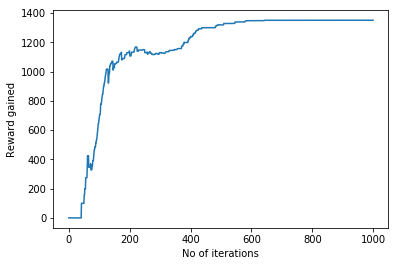

In [80]:
# Testing 
current_state = 0
steps = [current_state] 
  
while current_state != 10: 
  
    next_step_index = np.where(Q[current_state, ] == np.max(Q[current_state, ]))[1] 
    if next_step_index.shape[0] > 1: 
        next_step_index = int(np.random.choice(next_step_index, size = 1)) 
    else: 
        next_step_index = int(next_step_index) 
    steps.append(next_step_index) 
    current_state = next_step_index 
  
print("Most efficient path:") 
print(steps) 
  
pl.plot(scores) 
pl.xlabel('No of iterations') 
pl.ylabel('Reward gained') 
pl.show() 

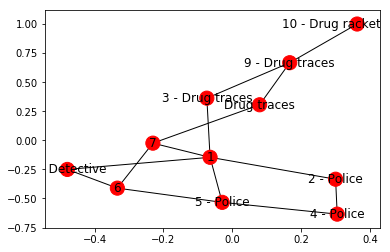

In [119]:
# Defining the locations of the police and the drug traces 
police = [2, 4, 5] 
drug_traces = [3, 8, 9] 
  
G = nx.Graph() 
G.add_edges_from(edges) 
mapping = {0:'0 - Detective', 1:'1', 2:'2 - Police', 3:'3 - Drug traces', 
           4:'4 - Police', 5:'5 - Police', 6:'6', 7:'7', 8:'Drug traces', 
           9:'9 - Drug traces', 10:'10 - Drug racket location'} 
  
H = nx.relabel_nodes(G, mapping) 
pos = nx.spring_layout(H) 
nx.draw_networkx_nodes(H, pos, node_size =[200, 200, 200, 200, 200, 200, 200, 200]) 
nx.draw_networkx_edges(H, pos) 
nx.draw_networkx_labels(H, pos) 
pl.show()  


In [120]:
scores = [] 
for i in range(1000): 
    current_state = np.random.randint(0, int(Q.shape[0])) 
    available_action = available_actions(current_state) 
    action = sample_next_action(available_action) 
    score = update(current_state, action, gamma) 
  
# print environmental matrices 
print('Police Found') 
print(env_police) 
print('') 
print('Drug traces Found') 
print(env_drugs) 


Police Found
[[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.  76.   0.   0.  46.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0. 144.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0. 133.   0.   0. 150.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.  98.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.  96.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]]

Drug traces Found
[[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.  66.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0. 143.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   

#### Challange-1 make use of the above two matrices and try to find the optimal path. 

/usr/local/lib64/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


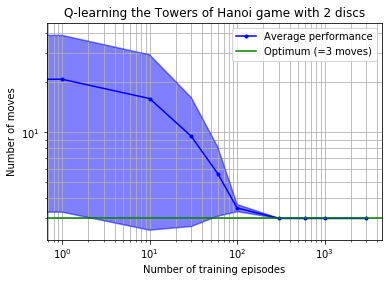

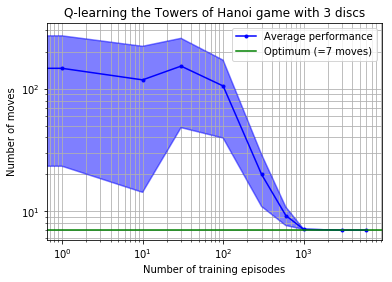

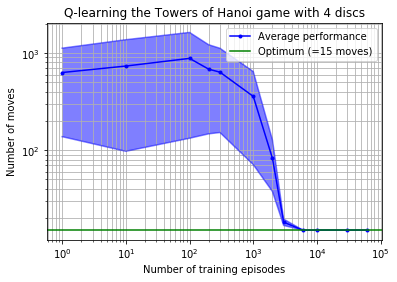

In [14]:
import numpy as np
import itertools
import pandas as pd
import matplotlib.pyplot as plt

class TowersOfHanoi:
    def __init__(self, state):
        self.state = state              # "State" is a tuple of length N, where N is the number of discs, and the elements are peg indices in [0,1,2]
        self.discs = len(self.state)

    def discs_on_peg(self, peg):
        return [disc for disc in range(self.discs) if self.state[disc] == peg]

    def move_allowed(self, move):
        discs_from = self.discs_on_peg(move[0])
        discs_to = self.discs_on_peg(move[1])
        if discs_from:
            return (min(discs_to) > min(discs_from)) if discs_to else True
        else:
            return False

    def get_moved_state(self, move):
        if self.move_allowed(move):
            disc_to_move = min(self.discs_on_peg(move[0]))
        moved_state = list(self.state)
        moved_state[disc_to_move] = move[1]
        return tuple(moved_state)

# Generates the reward matrix for the Towers of Hanoi game as a Pandas DataFrame
def generate_reward_matrix(N):      # N is the number of discs
    states = list(itertools.product(list(range(3)), repeat=N))
    moves = list(itertools.permutations(list(range(3)), 2))
    R = pd.DataFrame(index=states, columns=states, data=-np.inf)
    for state in states:
        tower = TowersOfHanoi(state=state)
        for move in moves:
            if tower.move_allowed(move):
                next_state = tower.get_moved_state(move)
                R[state][next_state] = 0
    final_state = tuple([2]*N)          # Define final state as all discs being on the last peg
    R[final_state] += 100               # Add a reward for all moves leading to the final state
    return R.values

def learn_Q(R, gamma=0.8, alpha=1.0, N_episodes=1000):
    Q = np.zeros(R.shape)
    states=list(range(R.shape[0]))
    for n in range(N_episodes):
        Q_previous = Q
        state = np.random.choice(states)                # Randomly select initial state
        next_states = np.where(R[state,:] >= 0)[0]      # Generate a list of possible next states
        next_state = np.random.choice(next_states)      # Randomly select next state from the list of possible next states
        V = np.max(Q[next_state,:])                     # Maximum Q-value of the states accessible from the next state
        Q[state, next_state] = (1-alpha)*Q[state, next_state] + alpha*(R[state, next_state] + gamma*V)      # Update Q-values
    if np.max(Q) > 0:
        Q /= np.max(Q)      # Normalize Q to its maximum value
    return Q

def get_policy(Q, R):
    Q_allowed = pd.DataFrame(Q)[pd.DataFrame(R) >= 0].values
    policy = []
    for i in range(Q_allowed.shape[0]):
        row = Q_allowed[i,:]
        sorted_vals = np.sort(row)
        sorted_vals = sorted_vals[~np.isnan(sorted_vals)][::-1]
        sorted_args = row.argsort()[np.where(~np.isnan(sorted_vals))][::-1]

        max_vals = [val for val in sorted_vals if val==sorted_vals[0]]
        max_args = [sorted_args[i] for i,val in enumerate(sorted_vals) if val==sorted_vals[0]]
        policy.append(max_args)
    return policy

def play(policy):
    start_state = 0
    end_state = len(policy)-1
    state = start_state
    moves = 0
    while state != end_state:
        state = np.random.choice(policy[state])
        moves += 1
    return moves

def play_average(policy, play_times=100):
    moves = np.zeros(play_times)
    for n in range(play_times):
        moves[n] = play(policy)
    return np.mean(moves), np.std(moves)

def Q_performance(R, episodes, play_times=100):
    means = np.zeros(len(episodes))
    stds = np.zeros(len(episodes))
    for n, N_episodes in enumerate(episodes):
        Q = learn_Q(R, N_episodes = N_episodes)
        policy = get_policy(Q,R)
        means[n], stds[n] = play_average(policy, play_times)
    return means, stds

def Q_performance_average(R, episodes, learn_times = 100, play_times=100):
    means_times = np.zeros((learn_times, len(episodes)))
    stds_times = np.zeros((learn_times, len(episodes)))
    for n in range(learn_times):
        means_times[n,:], stds_times[n,:] = Q_performance(R, episodes, play_times=play_times)
    means_averaged = np.mean(means_times, axis = 0)
    stds_averaged = np.mean(stds_times, axis = 0)
    return means_averaged, stds_averaged

def plot_results(episodes, means_averaged, stds_averaged, N, block=False):
    fig = plt.figure()
    plt.loglog(episodes, means_averaged,'b.-',label='Average performance')
    plt.loglog(episodes, means_averaged + stds_averaged, 'b', alpha=0.5)
    plt.loglog(episodes, means_averaged - stds_averaged, 'b', alpha=0.5)
    plt.fill_between(episodes, means_averaged-stds_averaged, means_averaged+stds_averaged, facecolor='blue', alpha=0.5)
    optimum_moves = 2**N - 1
    plt.axhline(y=optimum_moves, color='g', label='Optimum (=%s moves)' % optimum_moves)
    plt.xlabel('Number of training episodes')
    plt.ylabel('Number of moves')
    plt.grid('on', which='both')
    plt.title('Q-learning the Towers of Hanoi game with %s discs' % N)
    handles, labels = plt.gca().get_legend_handles_labels()
    plt.legend(handles, labels)
    plt.show(block=block)


N = 2                                   # Number of discs in the Towers of Hanoi game
R = generate_reward_matrix(N)
episodes = [0, 1, 10, 30, 60, 100, 300, 600, 1000, 3000]
means_averaged, stds_averaged = Q_performance_average(R, episodes, learn_times=100, play_times=100)
plot_results(episodes, means_averaged, stds_averaged, N)

N = 3                                   # Number of discs in the Towers of Hanoi game
R = generate_reward_matrix(N)
episodes = [0, 1, 10, 30, 100, 300, 600, 1000, 3000, 6000]
means_averaged, stds_averaged = Q_performance_average(R, episodes, learn_times=10, play_times=10)
plot_results(episodes, means_averaged, stds_averaged, N)

N = 4                                   # Number of discs in the Towers of Hanoi game
R = generate_reward_matrix(N)
episodes = [1, 10, 100, 200, 300, 1000, 2000, 3000, 6000, 10000, 30000, 60000]
means_averaged, stds_averaged = Q_performance_average(R, episodes, learn_times=10, play_times=10)
plot_results(episodes, means_averaged, stds_averaged, N, block=True)

#### Challange-2 make use of the above code and dispaly the optimal solutons for discs 2, 3 and 4 respectively.